This is data analysis project that tracks the "anomalies" or "inconsistencies" in two data sets. This program identifies Mismatched in key columns (Name, email ID, Phone, etc.) and highlights missing or extra recors. Finally, it give an outputs a clean discrepancy report.

In [2]:
# Beginning - Loading the data (A synthetic data that simulates real-world KYC)

import pandas as pd # Library

# Creating master data

master_data = pd.DataFrame({
    'ClientID' : [101, 102, 103, 104, 105],
    'Name' : ['Alice Johnson', 'Bob Smith', 'Charlie Lee', 'Daisy Paul', 'Carol Davis'],
    'Email' : ['alice@abc.com', 'bob@abc.com', 'charlie@abc.com', 'daisy@abc.com', 'carol@abc.com'],
    'Phone' : ['+911111111111', '+91111111111112', '+91111111111113', '+91111111111114', '+91111111111115']
})

#Create new data (simulation entry mistakes)

new_data = pd.DataFrame({
    'ClientID' : [101, 102, 104, 105, 106],
    'Name' : ['Alice Johnson', 'Bob S.', 'Daisy Paul', 'Evan Singh', "Jovice Mariam"],
    'Email' : ['alice@abc.com', 'bobsmith@abc.com', 'daisy@abc.com', 'evan@abc.com', 'Jovice@abc.com'],
    'Phone' : ['+911111111111', '+91111111119999', '+91111111111114', '+91111111111115', '+91111111111116']
})

#save as CSV

master_data.to_csv('master_data.csv', index=False)
new_data.to_csv('new_data.csv', index=False)

In [9]:
# compare data and generate report

master = pd.read_csv('master_data.csv')
new = pd.read_csv('new_data.csv')

# Create a merged data

merged = pd.merge(master, new, on='ClientID', how='outer', suffixes=('_master', '_new'), indicator=True)

# mismatched entries

mismatched = merged[
    (merged['_merge'] == 'both') & (
        (merged['Name_master'] != merged['Name_new']) |
        (merged['Email_master'] != merged['Email_new']) |
        (merged['Phone_master'] != merged['Phone_new'])
    )
]

# Records only in master

only_in_master = merged[merged['_merge']== 'left_only']

# Records only in new

only_in_new = merged[merged['_merge'] == 'left_only']

# Show all

print('----- Mismatches -----')
display(only_in_master)

print('----- Only in Master -----')
display(only_in_new)


----- Mismatches -----


,ClientID,Name_master,Email_master,Phone_master,Name_new,Email_new,Phone_new,_merge
2,103,Charlie Lee,charlie@abc.com,9.111111e+13,NaN,NaN,NaN,left_only


----- Only in Master -----


,ClientID,Name_master,Email_master,Phone_master,Name_new,Email_new,Phone_new,_merge
2,103,Charlie Lee,charlie@abc.com,9.111111e+13,NaN,NaN,NaN,left_only


In [12]:
# Export in one excel file

with pd.ExcelWriter('discrepancy_report.xlsx') as writer:

    mismatched.to_excel(writer, sheet_name='Mismatches', index=False)

    only_in_master.to_excel(writer, sheet_name='Only in Master', index=False)

    only_in_new.to_excel(writer, sheet_name='Only in New', index=False)

from google.colab import files
files.download('discrepancy_report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exception ignored in: <function ZipFile.__del__ at 0x7d628780a7a0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/zipfile.py", line 1895, in __del__
    self.close()
  File "/usr/lib/python3.11/zipfile.py", line 1912, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


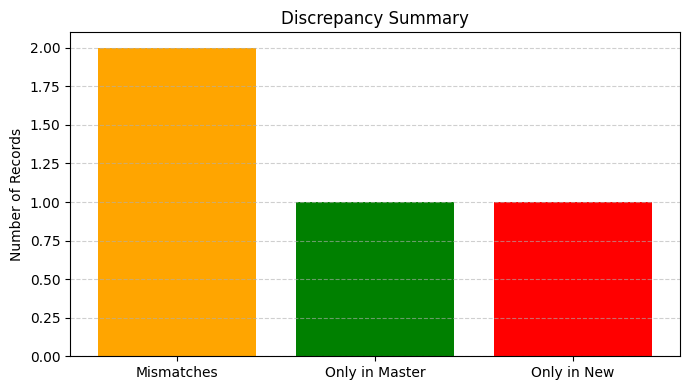

In [14]:
import matplotlib.pyplot as plt

# Count mismatches and unique records
counts = {
    'Mismatches': mismatched.shape[0],
    'Only in Master': only_in_master.shape[0],
    'Only in New': only_in_new.shape[0]
}

# Plot
plt.figure(figsize=(7, 4))
plt.bar(counts.keys(), counts.values(), color=['orange', 'green', 'red'])
plt.title('Discrepancy Summary')
plt.ylabel('Number of Records')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('chart.png')
plt.show()
